### ในบทที่ผ่านๆมาเราพูดถึงแต่ปัญหาการจำแนกประเภทข้อมูล
### ในบทนี้จะแสดงถึงตัวอย่างการใช้ในปัญหาวิเคราะห์การถดถอยบ้าง

# การวิเคราะห์การถดถอย (regression) คือการหาความสัมพันธ์ระหว่างตัวแปรต้นกับตัวแปรตาม



In [1]:
import numpy as np
import matplotlib.pyplot as plt

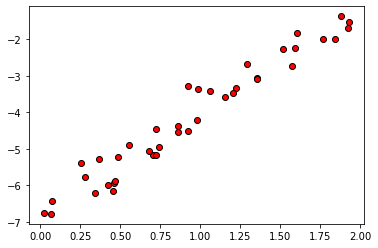

In [4]:
x = np.random.uniform(0, 2, 40)
z = 3*x - 7 + np.random.normal(0, .3, 40)
plt.scatter(x, z, c='r', edgecolor='k')
plt.show()

## z = xw+b แบบนี้เรียกว่าการวิเคราะห์การถดถอยเชิงเส้น (linear regression)
#### ทั้งการวิเคราะห์การถดถอยและการวิเคราะห์จำแนกประเภทนั้นต่างก็เป็นการหาความสัมพันธ์ระหว่างตัวแปรต้นและตัวแปรตามเหมือนกัน แต่ต่างกันตรงที่ตัวแปรตามในการวิเคราะห์การจำแนกประเภทคือประเภทที่จำแนกได้ ส่วนการวิเคราะห์การถดถอยตัวแปรตามคือค่าตัวเลข

#### ในการวิเคราะห์การถดถอยเชิงเส้นนั้นเราอาจตั้งโครงข่ายประสาทในลักษณะเหมือน***เพอร์เซปตรอนชั้นเดียว***ที่ใช้ในปัญหาการจำแนกประเภท (บทที่ ๓) แต่ต่างกันตรงที่ไม่ต้องใช้ฟังก์ชันกระตุ้นเลย ในขณะที่ในปัญหาการจำแนกประเภทนั้นเวลาหาคำนวณค่าเสียหายจะใช้ฟังก์ชันกระตุ้น คือฟังก์ชันซิกมอยด์หรือซอฟต์แม็กซ์ แล้วตามด้วยการหาค่าเอนโทรปีไขว้


# ในการวิเคราะห์การถดถอยจะไม่มีการใช้ฟังก์ชันกระตุ้น
### ใช้ค่าความเสียหายเป็นค่าความต่างกำลังสองเฉลี่ย (Sqaured Deviation) like stat m.6
# $$ \begin{align}
J = \frac{1}{n}\sum_{i=0}^{i=n-1}(h_i-z_i)^2
\end{align} $$
#### โดย z คือคำตอบจริง ส่วน h คือคำตอบที่คำนวณได้ ***จะเห็นว่ายิ่งต่างกันมากค่าก็ยิ่งมากแสดงว่ายิ่งไม่ดี*** จึงเป็นค่าที่จะต้องลด

# $$
\begin{align}
\vec{h} = \mathbf{x} \cdot \vec{w} + b
\end{align}
$$

# อนุพันธ์ของค่าเสียหายเทียบกับ w และ b ก็จะได้
## $$
\begin{align}
\frac{\partial \vec{h}}{\partial \vec{w}} &= \mathbf{x} \\
\frac{\partial J}{\partial \vec{h}} &= \frac{2}{n}(\vec{h}-\vec{z}) \\
\frac{\partial J}{\partial \vec{w}} &= \frac{\partial J}{\partial \vec{h}} \frac{\partial \vec{h}}{\partial \vec{w}} = \frac{2}{n} \mathbf{x}^T \cdot (\vec{h}-\vec{z})
\end{align}
$$


# ต่อมาลองนิยามคลาสของชั้นค่าเสียหายนี้เหมือนกับที่ทำกับชั้นอื่นๆที่ผ่านมา


In [5]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../Side Stories/')

In [6]:
from unagi import Chan, Affin, Relu, Sigmoid, Adam

In [7]:
class Mse(Chan):
    def pai(self, h, z):
        self.z = z[:, None]
        self.h = h
        return ((self.z - h)**2).mean()
    def yon(self, g):
        return g*2 * (self.h - self.z) / len(self.z)

In [8]:
class LinearRegression:
    def learn(self, X, z, n_learns):
        self.layers =[Affin(X.shape[1], 1, 0),
                     Mse()]
        self.opt = Adam(self.layers[0].param)
        for o in range(n_learns):
            h = self.layers[0](X)
            mse = self.layers[1](h, z)
            mse.phraeyon()
            self.opt()
    def predict(self, X):
        h = self.layers[0].pai(X)
        return h.ravel()

# ลองนำมาใช้กับข้อมูลหนึ่งมิติ

In [9]:
x = np.random.uniform(0, 2, 30)
X = x[:, None]
z = 2*x-3 + np.random.normal(0, 0.4, 30)


In [10]:
model = LinearRegression()
model.learn(X, z, 10000)


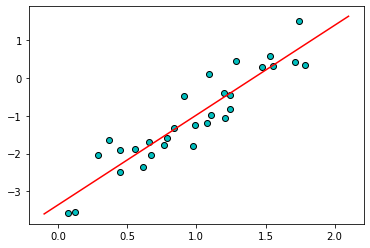

In [12]:
x_ = np.linspace(-.1, 2.1, 101)
X_ = x_[:, None]
z_ = model.predict(X_)

plt.scatter(x, z, c='c', edgecolor='k')
plt.plot(x_, z_, 'r')
plt.show()

# ลองใช้กับข้อมูลสองมิติ


In [14]:
from mpl_toolkits.mplot3d import Axes3D

X = np.random.uniform(-1, 1, [100, 2])
x, y = X.T
z = np.random.normal(x*2 + y*3 + 1, scale=1)

In [15]:
model = LinearRegression()
model.learn(X, z, 10000)


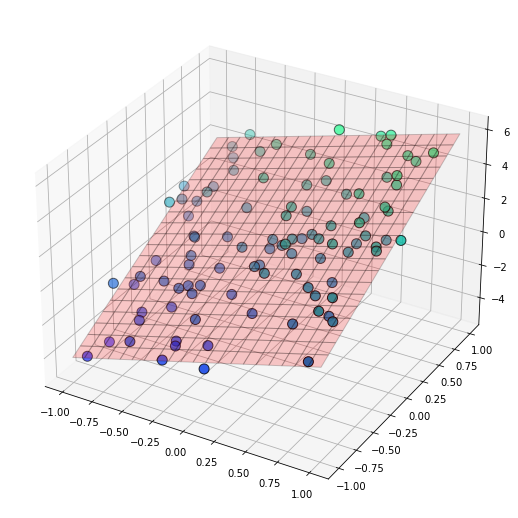

In [22]:
plt.figure(figsize=(7,7))
ax = plt.axes([0,0,1,1], projection='3d')
ax.scatter(x, y, z, c=z, s=100,  edgecolor='k', cmap='winter')

mx, my = np.meshgrid(np.linspace(-1, 1, 21), 
                    np.linspace(-1, 1, 21))
mX = np.array([mx.ravel(), my.ravel()]).T
mz = model.predict(mX).reshape(21, -1)
ax.plot_surface(mx, my, mz, rstride=1, 
               cstride=1, alpha=.2, 
               color='r', edgecolor='k')
plt.show()

# Non-Linear Regression
##### เพื่อที่จะแก้ปัญหาที่ไม่เป็นเชิงเส้นจำเป็นต้องสร้างโครงข่ายประสาทที่ประกอบไปด้วย***สองชั้นขึ้นไป*** ปัญหาการวิเคราะห์การถดถอยก็เช่นกัน

####  แม้ว่าชั้นสุดท้ายจะไม่ต้องการฟังก์ชันกระตุ้น แต่ว่าในระหว่างชั้นต่างๆยังคงจำเป็นจะต้องใช้ฟังก์ชันกระตุ้นอยู่

In [26]:
class NNRegression:
    def __init__(self, m1, m2, eta=.001):
        self.m1 = m1
        self.m2 = m2
        self.eta = eta
        self.layers = [
            None, 
            Relu(),
            Affin(m1, m2, np.sqrt(2./m1)),
            Relu(),
            Affin(m2, 1, 0),
            Mse()
        ]
    def learn(self, X, z, n_learns):
        m0 = X.shape[1]
        self.layers[0] = Affin(m0, self.m1, np.sqrt(2./m0))
        self.opt = Adam(self.param(), eta=self.eta)
        
        for o in range(n_learns):
            mse = self.cal_mse(X, z)
            mse.phraeyon()
            self.opt()
    
    def cal_mse(self, X, z):
        for layer in self.layers[:-1]:
            X = layer(X)
        return self.layers[-1](X, z)
    
    def param(self):
        p = []
        for layer in self.layers:
            if hasattr(layer, 'param'):
                p.extend(layer.param)
        return p
    
    def predict(self, X):
        for layer in self.layers[:-1]:
            X = layer(X)
            return X.kha.ravel()


ValueError: x and y must have same first dimension, but have shapes (101,) and (2020,)

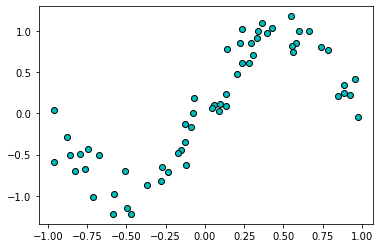

In [39]:
np.random.seed(0)
x = np.random.uniform(-1, 1, 60)
X = x[:, None]
z = np.sin(x*3) + np.random.normal(0, .2, 60)


m1, m2 = 20, 30
nn = NNRegression(m1, m2, eta=.005)
nn.learn(X, z, 1000)

x_ = np.linspace(-1.2, 1.2, 101)
X_ = x_[:,None]
z_ = nn.predict(X_)

plt.scatter(x, z, c='c', edgecolor='k')
plt.plot(x_, z_, 'r')
plt.show()

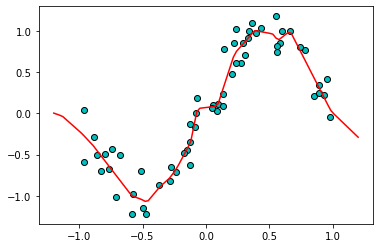

In [37]:
class PrasatThotthoi:
    def __init__(self,m1,m2,eta=0.001):
        self.m1 = m1
        self.m2 = m2
        self.eta = eta
        self.chan = [None,
                     Relu(),
                     Affin(m1,m2,np.sqrt(2./m1)),
                     Relu(),
                     Affin(m2,1,0),
                     Mse()]
    
    def rianru(self,X,z,n_thamsam):
        m0 = X.shape[1]
        self.chan[0] = Affin(m0,self.m1,np.sqrt(2./m0))
        self.opt = Adam(self.param(),eta=self.eta)
        for o in range(n_thamsam):
            mse = self.ha_mse(X,z)
            mse.phraeyon()
            self.opt()
    
    def ha_mse(self,X,z):
        for c in self.chan[:-1]:
            X = c(X)
        return self.chan[-1](X,z)
    
    def param(self):
        p = []
        for c in self.chan:
            if(hasattr(c,'param')):
                p.extend(c.param)
        return p
    
    def thamnai(self,X):
        for c in self.chan[:-1]:
            X = c(X)
        return X.kha.ravel()

np.random.seed(0)
x = np.random.uniform(-1,1,60)
X = x[:,None]
z = np.sin(x*3)+np.random.normal(0,0.2,60)

m1,m2 = 20,30
ps = PrasatThotthoi(m1,m2,eta=0.005)
ps.rianru(X,z,1000)
x_ = np.linspace(-1.2,1.2,101)
X_ = x_[:,None]
z_ = ps.thamnai(X_)
plt.scatter(x,z,c='c',edgecolor='k')
plt.plot(x_,z_,'r')
plt.show()